<a href="https://colab.research.google.com/github/luisangel22091102/TAREAS-DE-METODOS-DE-SIMULACION/blob/main/TAREA_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MENDEZ VASQUEZ LUIS ANGEL**

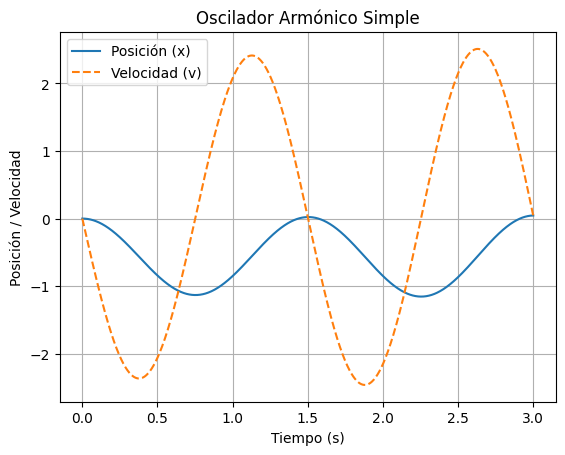

In [1]:
import numpy as np
import matplotlib.pyplot as plt


N = 1000
xo = 0.0
vo = 0.0
tau = 3.0
dt = tau / float(N - 1)
k = 3.5
m = 0.2
gravity = 9.8


time = np.linspace(0, tau, N)


y = np.zeros((N, 2))
y[0, 0] = xo
y[0, 1] = vo


def SHO(state, time):
    g0 = state[1]
    g1 = -k/m * state[0] - gravity
    return np.array([g0, g1])


for j in range(N - 1):
    y[j + 1] = y[j] + dt * SHO(y[j], time[j])

xdata = [y[j, 0] for j in range(N)]
vdata = [y[j, 1] for j in range(N)]


plt.plot(time, xdata, label="Posición (x)")
plt.plot(time, vdata, label="Velocidad (v)", linestyle='--')
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición / Velocidad")
plt.title("Oscilador Armónico Simple")
plt.legend()
plt.grid(True)
plt.show()

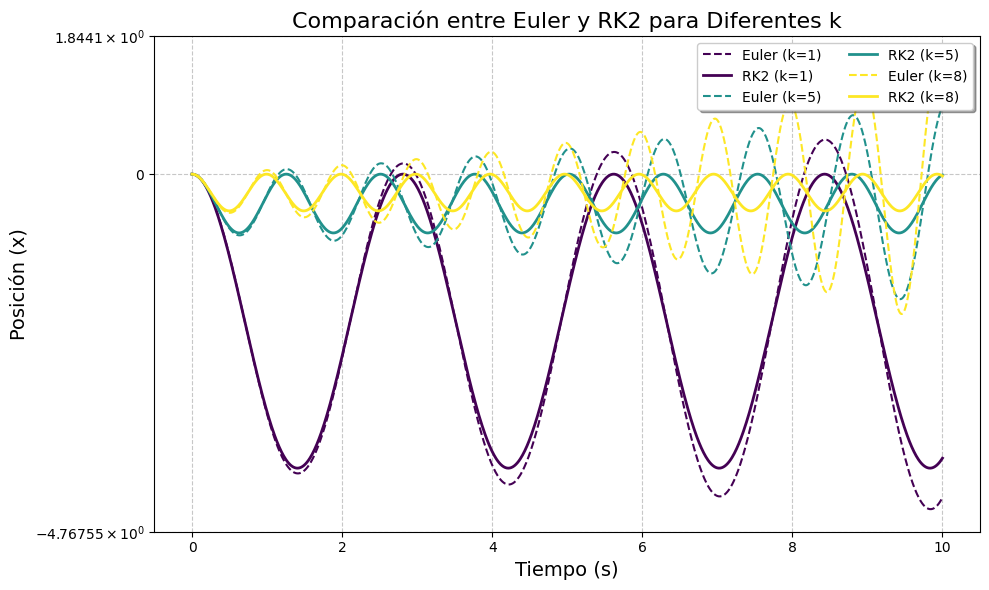

In [2]:

import numpy as np
import matplotlib.pyplot as plt


N = 1000
xo = 0.0
vo = 0.0
tau = 10.0
dt = tau / float(N - 1)
m = 0.2
gravity = 9.8



def rk2(y, time, dt, derivs):
    k0 = dt * derivs(y, time)
    k1 = dt * derivs(y + k0, time + dt)
    y_next = y + 0.5 * (k0 + k1)
    return y_next



def SHO(state, time):
    g0 = state[1]
    g1 = -k / m * state[0] - gravity
    return np.array([g0, g1])


k_values = [1, 5 , 8]
plt.figure(figsize=(10, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(k_values)))
for idx, k  in enumerate(k_values):
    y_euler = np.zeros((N, 2))
    y_rk2 = np.zeros((N, 2))
    y_euler[0, 0] = xo
    y_euler[0, 1] = vo
    y_rk2[0, 0] = xo
    y_rk2[0, 1] = vo


    for j in range(N - 1):
        y_euler[j + 1] = y_euler[j] + dt * SHO(y_euler[j], j * dt)

    for j in range(N - 1):
        y_rk2[j + 1] = rk2(y_rk2[j], j * dt, dt, SHO)

    plt.plot(
        np.linspace(0, tau, N), y_euler[:, 0],
        label=f"Euler (k={k})",
        linestyle='--',
        linewidth=1.5,
        color=colors[idx]
    )

    plt.plot(
        np.linspace(0, tau, N), y_rk2[:, 0],
        label=f"RK2 (k={k})",
        linestyle='-',
        linewidth=2.0,
        color=colors[idx],
    )
plt.yscale('symlog', linthresh=10)
plt.title("Comparación entre Euler y RK2 para Diferentes k", fontsize=16)
plt.xlabel("Tiempo (s)", fontsize=14)
plt.ylabel("Posición (x)", fontsize=14)
plt.legend(loc='upper right', fontsize=10, frameon=True, shadow=True, ncol=2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


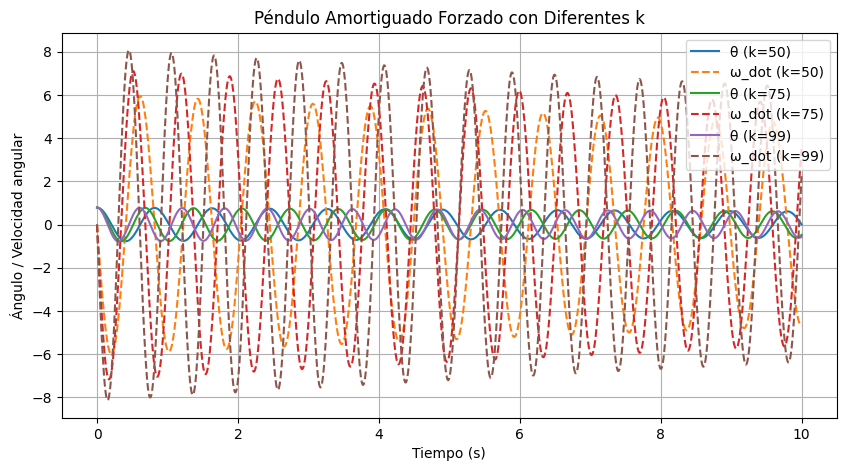

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

g = 9.81
L = 1.0
b = 0.05
beta = 0.1
omega = 1.0

k_values = [50, 75, 99]

def pendulum_def(state, time, k):
    theta, omega_dot = state
    dtheta_dt = omega_dot
    domega_dt = -(g / L) * np.sin(theta) - b * omega_dot - k * theta + beta * np.cos(omega * time)
    return [dtheta_dt, domega_dt]

theta_0 = np.pi / 4
omega_dot_0 = 0.0
state_0 = [theta_0, omega_dot_0]


time = np.linspace(0, 10, 1000)

plt.figure(figsize=(10, 5))

for k in k_values:

    solution = odeint(pendulum_def, state_0, time, args=(k,))


    theta_sol = solution[:, 0]
    omega_dot_sol = solution[:, 1]


    plt.plot(time, theta_sol, label=f'θ (k={k})')
    plt.plot(time, omega_dot_sol, label=f'ω_dot (k={k})', linestyle='--')


plt.title('Péndulo Amortiguado Forzado con Diferentes k')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo / Velocidad angular')
plt.legend()
plt.grid(True)
plt.show()